<a href="https://colab.research.google.com/github/tylerlum/covid19_pocus_ultrasound/blob/master/POCOVIDNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POCOVIDNET

Notebook to explore the POCOVIDNET model and software

## Clone and install software

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/tylerlum/covid19_pocus_ultrasound.git

Cloning into 'covid19_pocus_ultrasound'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 16248 (delta 99), reused 181 (delta 59), pack-reused 15972
Receiving objects: 100% (16248/16248), 1.22 GiB | 44.85 MiB/s, done.
Resolving deltas: 100% (4037/4037), done.
Checking out files: 100% (3934/3934), done.


In [3]:
%cd covid19_pocus_ultrasound/pocovidnet

/content/covid19_pocus_ultrasound/pocovidnet


In [4]:
!pwd
!ls

/content/covid19_pocus_ultrasound/pocovidnet
assets	Dockerfile  notebooks  pocovidnet  requirements.txt  setup.py
bin	LICENSE     plots      README.md   scripts


In [5]:
!pip install -e .

Obtaining file:///content/covid19_pocus_ultrasound/pocovidnet
  Running setup.py develop for pocovidnet


## Build dataset

In [6]:
!python3 scripts/build_image_dataset.py

Cov-Atlas-Day+4.gif framerate 10.0 width 230.0 height 230.0 number frames: 40.0
--> taking every  3 th image
pneu-radiopaeda.mp4 framerate 30.0 width 221.0 height 236.0 number frames: 223.0
--> taking every  10 th image
Reg_pat4Image_140434.mpeg framerate 25.0 width 370.0 height 370.0 number frames: 323.0
--> taking every  8 th image
Cov_denault_proposedUS_vid11.mov framerate 59.583333333333336 width 852.0 height 852.0 number frames: 143.0
--> taking every  19 th image
Pneu-Atlas-pneumonia.gif framerate 10.0 width 208.0 height 208.0 number frames: 59.0
--> taking every  3 th image
Cov-clarius.gif framerate 10.0 width 313.0 height 313.0 number frames: 104.0
--> taking every  3 th image
Reg_pat4Image_140705.mpeg framerate 25.0 width 370.0 height 370.0 number frames: 266.0
--> taking every  8 th image
Cov-Atlas-Day+3.gif framerate 10.0 width 240.0 height 240.0 number frames: 40.0
--> taking every  3 th image
Reg_pat1Image_133232.mpeg framerate 25.0 width 370.0 height 370.0 number frames: 

In [7]:
%cd ../data

/content/covid19_pocus_ultrasound/data


In [8]:
!cp "/content/drive/My Drive/COVID Clinical Gallery Butterfly Network.zip" .

In [9]:
!sh parse_butterfly.sh

Archive:  COVID Clinical Gallery Butterfly Network.zip
  inflating: butterfly/Consolidation/Subpleural Basal Consolidation.mp4  
  inflating: butterfly/B lines/Patchy B lines with Sparing.mp4  
  inflating: butterfly/Consolidation/Subpleural Basal Consolidation_Example 2.mp4  
  inflating: butterfly/Consolidation/Consolidation_Example 2.mp4  
  inflating: butterfly/Normal Lung/Normal Lung_Example 2.mp4  
  inflating: butterfly/B lines/Confluent B lines_Example 2.mp4  
  inflating: butterfly/B lines/Coalescing B lines.mp4  
  inflating: butterfly/Consolidation/Consolidation_Example 5.mp4  
  inflating: butterfly/Consolidation/Consolidation_Example 3.mp4  
  inflating: butterfly/Consolidation/Consolidation_Example 4.mp4  
  inflating: butterfly/Irregular Pleural Line/Irregular Pleural Line.mp4  
  inflating: butterfly/Irregular Pleural Line/Irregular Pleural Line_Example 2.mp4  
  inflating: butterfly/Consolidation/Consolidation.mp4  
  inflating: butterfly/Irregular Pleural Line/Irregul

In [10]:
!python3 ../pocovidnet/scripts/process_butterfly_videos.py  

2020-10-08 22:33:35.061754: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
pocus_videos/convex/Cov
PROCESS Subpleural Basal Consolidation_Example 2.mp4 Cov framerate 22 width 880.0 height 1080.0 number frames: 92.0
output video size (616, 616)
DONE (91, 616, 616, 3)
pocus_videos/convex/Cov
PROCESS Consolidation_Example 3.mp4 Cov framerate 19 width 1928.0 height 1080.0 number frames: 80.0
output video size (980, 980)
DONE (80, 980, 980, 3)
pocus_videos/convex/Cov
PROCESS Consolidation.mp4 Cov framerate 19 width 880.0 height 1080.0 number frames: 126.0
output video size (616, 616)
DONE (125, 616, 616, 3)
pocus_videos/convex/Cov
PROCESS Subpleural Basal Consolidation.mp4 Cov framerate 21 width 880.0 height 1080.0 number frames: 111.0
output video size (616, 616)
DONE (111, 616, 616, 3)
pocus_videos/convex/Cov
PROCESS Consolidation with Air Bronchograms.mp4 Cov framerate 30 width 720.0 height 1236.0 number frames: 641.0

## Setup cross validation

In [11]:
%cd ../pocovidnet

/content/covid19_pocus_ultrasound/pocovidnet


In [12]:
!python3 scripts/cross_val_splitter.py --splits 5

## Train

In [14]:
# Modify early stopping
!python3 scripts/train_covid19.py --trainable_base_layers 3 --model_id 'vgg_base' --learning_rate 1e-4 --data_dir '../data/cross_validation' --fold 0 --epochs 40 --batch_size 8

2020-10-08 22:35:46.107612: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model parameters: {'data_dir': '../data/cross_validation', 'model_dir': 'models/', 'fold': 0, 'learning_rate': 0.0001, 'epochs': 40, 'batch_size': 8, 'trainable_base_layers': 3, 'img_width': 224, 'img_height': 224, 'model_id': 'vgg_base', 'log_softmax': False, 'model_name': 'test', 'hidden_size': 64}
Loading images...
selected fold: 0

Number of training samples: 2299 
Number of testing samples: 504
tcmalloc: large alloc 2768510976 bytes == 0x388be000 @  0x7f354aa061e7 0x7f353efb15e1 0x7f353f015c78 0x7f353f015d93 0x7f353f0c8fed 0x7f353f0c994e 0x7f353f0cc2c8 0x7f353f20c276 0x7f353f20dd44 0x7f353f210492 0x7f353f21130e 0x5a4a0c 0x5a50d8 0x7f353f0d47f7 0x59cb00 0x50ed74 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f354a603b97 0x5b26fa
Class mappings are: ['covid' 'pneumonia' 'regular']
2020-10-08 22:36:01.700768: I tensorflow

In [15]:
# Modify early stopping
!python3 scripts/train_covid19.py --trainable_base_layers 3 --model_id 'vgg_base' --learning_rate 1e-4 --data_dir '../data/cross_validation' --fold 1 --epochs 40 --batch_size 8

2020-10-08 22:49:16.088298: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model parameters: {'data_dir': '../data/cross_validation', 'model_dir': 'models/', 'fold': 1, 'learning_rate': 0.0001, 'epochs': 40, 'batch_size': 8, 'trainable_base_layers': 3, 'img_width': 224, 'img_height': 224, 'model_id': 'vgg_base', 'log_softmax': False, 'model_name': 'test', 'hidden_size': 64}
Loading images...
selected fold: 1

Number of training samples: 2386 
Number of testing samples: 417
tcmalloc: large alloc 2873278464 bytes == 0x38646000 @  0x7f933228f1e7 0x7f932683a5e1 0x7f932689ec78 0x7f932689ed93 0x7f9326951fed 0x7f932695294e 0x7f93269552c8 0x7f9326a95276 0x7f9326a96d44 0x7f9326a99492 0x7f9326a9a30e 0x5a4a0c 0x5a50d8 0x7f932695d7f7 0x59cb00 0x50ed74 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f9331e8cb97 0x5b26fa
Class mappings are: ['covid' 'pneumonia' 'regular']
2020-10-08 22:49:33.714471: I tensorflow

In [19]:
from tensorflow import keras
model0 = keras.models.load_model('models/test/_fold_0/last_epoch')
# model1 = keras.models.load_model('models/test/_fold_1/last_epoch.h5')

In [26]:
from keras.layers import Dropout
from keras.models import Model, Input

def create_mc_model(model):
  layers = [l for l in model.layers]
  x = layers[0].output
  for i in range(1, len(layers)):
      # Replace dropout layers with MC dropout layers
      if isinstance(layers[i], Dropout):
          x = Dropout(0.5)(x, training=True)
      else:
          x = layers[i](x)
  mc_model = Model(inputs=layers[0].input, outputs=x)
  mc_model.set_weights(model.get_weights())
  return mc_model

mc_model0 = create_mc_model(model0)
# mc_model1 = create_mc_model(model1)

In [35]:
import numpy as np
idx = 100
input_shape = (224, 224, 3)
img = np.random.random(input_shape)
# img = dfd

In [36]:
def get_predictions(mc_model, img):
  import tqdm
  predictions = []
  for i in tqdm.tqdm(range(500)):
      y_p = mc_model.predict(np.array([img]))
      predictions.append(y_p[0])
  return np.array(predictions)

predictions0 = get_predictions(mc_model0, img)
# predictions1 = get_predictions(mc_model1, img)

100%|██████████| 500/500 [00:22<00:00, 22.08it/s]


In [37]:
def print_info(predictions):
  print("posterior mean: {}".format(predictions.mean(axis=0).argmax()))
  print()
  # probability + variance
  for i, (prob, var) in enumerate(zip(predictions.mean(axis=0), predictions.std(axis=0))):
      print("class: {}; proba: {:.1%}; var: {:.2%} ".format(i, prob, var))

print_info(predictions0)
# print_info(predictions1)

posterior mean: 0

class: 0; proba: 84.4%; var: 23.13% 
class: 1; proba: 15.0%; var: 22.90% 
class: 2; proba: 0.5%; var: 1.69% 


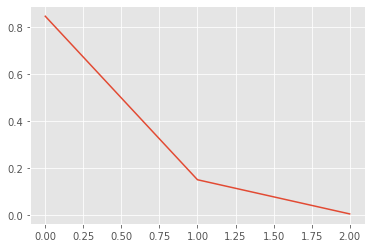

In [43]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
def plot_predictions(predictions):  
  x, y = list(range(len(predictions.mean(axis=0)))), predictions.mean(axis=0)
  plt.plot(x, y)

plot_predictions(predictions0)
# plot_predictions(predictions1)

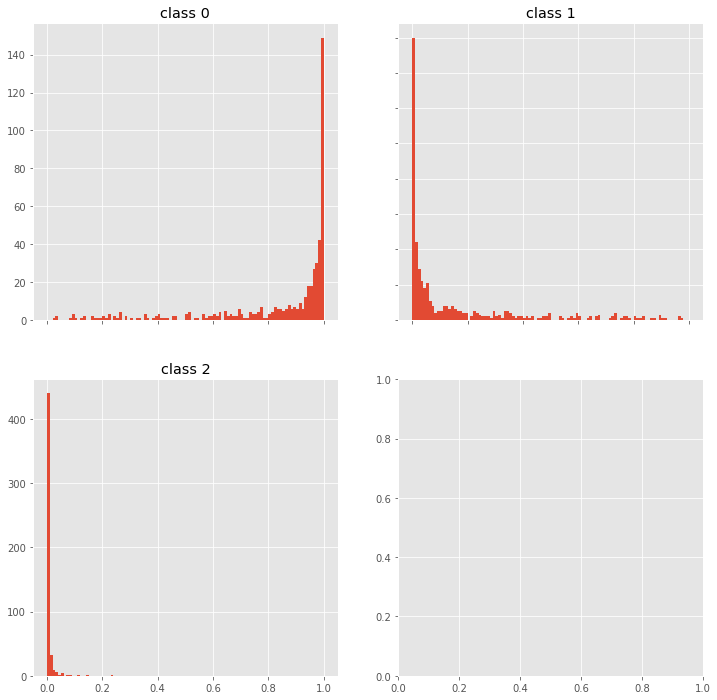

In [45]:
def plot_distributions(predictions):
  fig, axes = plt.subplots(2, 2, figsize=(12,12))

  for i, ax in enumerate(fig.get_axes()):
      if i == 3:
        break
      ax.hist(predictions[:,i], bins=100, range=(0,1))
      ax.set_title(f"class {i}")
      ax.label_outer()

plot_distributions(predictions0)
# plot_distributions(predictions1)

In [ ]:
  mc_model0.predict(np.expand_dims(x_test[222], axis=0), batch_size=1).argmax()

In [ ]:
# Modify early stopping
!python3 scripts/train_covid19.py --trainable_base_layers 3 --model_id 'vgg_cam' --learning_rate 1e-4 --data_dir '../data/cross_validation' --fold 2 --epochs 40 --batch_size 8

2020-10-07 18:30:24.693985: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model parameters: {'data_dir': '../data/cross_validation', 'model_dir': 'models/', 'fold': 2, 'learning_rate': 0.0001, 'epochs': 40, 'batch_size': 8, 'trainable_base_layers': 3, 'img_width': 224, 'img_height': 224, 'model_id': 'vgg_cam', 'log_softmax': False, 'model_name': 'test', 'hidden_size': 64}
Loading images...
selected fold: 2

Number of training samples: 2245 
Number of testing samples: 558
tcmalloc: large alloc 2703482880 bytes == 0x37b76000 @  0x7f8308df41e7 0x7f82fd39f5e1 0x7f82fd403c78 0x7f82fd403d93 0x7f82fd4b6fed 0x7f82fd4b794e 0x7f82fd4ba2c8 0x7f82fd5fa276 0x7f82fd5fbd44 0x7f82fd5fe492 0x7f82fd5ff30e 0x5a4a0c 0x5a50d8 0x7f82fd4c27f7 0x59cb00 0x50ed74 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f83089f1b97 0x5b26fa
Class mappings are: ['covid' 'pneumonia' 'regular']
2020-10-07 18:30:40.690789: I tensorflow/

In [ ]:
# Modify early stopping
!python3 scripts/train_covid19.py --trainable_base_layers 3 --model_id 'vgg_cam' --learning_rate 1e-4 --data_dir '../data/cross_validation' --fold 3 --epochs 40 --batch_size 8

python3: can't open file 'scripts/train_covid19.py': [Errno 2] No such file or directory


In [ ]:
# Modify early stopping
!python3 scripts/train_covid19.py --trainable_base_layers 3 --model_id 'vgg_cam' --learning_rate 1e-4 --data_dir '../data/cross_validation' --fold 4 --epochs 40 --batch_size 8

2020-10-07 18:59:25.091422: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model parameters: {'data_dir': '../data/cross_validation', 'model_dir': 'models/', 'fold': 4, 'learning_rate': 0.0001, 'epochs': 40, 'batch_size': 8, 'trainable_base_layers': 3, 'img_width': 224, 'img_height': 224, 'model_id': 'vgg_cam', 'log_softmax': False, 'model_name': 'test', 'hidden_size': 64}
Loading images...
selected fold: 4

Number of training samples: 2203 
Number of testing samples: 600
tcmalloc: large alloc 2652905472 bytes == 0x37100000 @  0x7f8e7edb41e7 0x7f8e7335f5e1 0x7f8e733c3c78 0x7f8e733c3d93 0x7f8e73476fed 0x7f8e7347794e 0x7f8e7347a2c8 0x7f8e735ba276 0x7f8e735bbd44 0x7f8e735be492 0x7f8e735bf30e 0x5a4a0c 0x5a50d8 0x7f8e734827f7 0x59cb00 0x50ed74 0x507f24 0x50b053 0x634dd2 0x634e87 0x63863f 0x6391e1 0x4b0dc0 0x7f8e7e9b1b97 0x5b26fa
Class mappings are: ['covid' 'pneumonia' 'regular']
2020-10-07 18:59:45.300178: I tensorflow/